In [28]:
import os
os.chdir(r"C:\Users\KALPANA  PATNALA\Desktop\Liver-Patients-Analysis\Datasets")

In [29]:
os.getcwd()

'C:\\Users\\KALPANA  PATNALA\\Desktop\\Liver-Patients-Analysis\\Datasets'

In [30]:
#Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [31]:
data=pd.read_csv('indian_liver_patient.csv')

In [32]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [33]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [34]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [35]:
pd.get_dummies(data['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
data = pd.concat([data,pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)

In [38]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1,0,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1,0,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1,0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1,0,1


In [39]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1,0,1


In [40]:
pd.get_dummies(data['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [41]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1,0,1


In [43]:
data["Albumin_and_Globulin_Ratio"] = data.Albumin_and_Globulin_Ratio.fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [44]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1,0,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1,0,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1,0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1,0,1


In [45]:
x = data.drop(['Gender','Dataset'], axis=1)
x.head(583)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1,0,1


In [46]:
y = data['Dataset']

In [47]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [48]:
data_corr=x.corr()

In [49]:
data_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000,1.000000,-1.000000


In [51]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1,0,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1,0,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1,0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1,0,1


In [50]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [25]:
data = data[(z < 3).all(axis=1)]

NameError: name 'z' is not defined

In [40]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [389]:
#Find outliers using IQR Score(i.e. IQR=Q3-Q1) 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                            25.00
Gender                          0.00
Total_Bilirubin                 1.20
Direct_Bilirubin                0.80
Alkaline_Phosphotase          115.25
Alamine_Aminotransferase       34.25
Aspartate_Aminotransferase     51.00
Total_Protiens                  1.40
Albumin                         1.20
Albumin_and_Globulin_Ratio      0.35
Dataset                         1.00
Gender_0                        0.00
Gender_1                        0.00
dtype: float64


In [390]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [391]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_0,Gender_1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0,1,0,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1,0,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.2,2,0,1
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.0,1,0,1
10,57,1,0.6,0.1,210,51,59,5.9,2.7,0.8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,90,1,1.1,0.3,215,46,134,6.9,3.0,0.7,1,0,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1,1,0,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.0,1,0,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0,1,0,1


In [392]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_0,Gender_1
count,270.000000,270.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.0
mean,45.092593,1.0,1.185185,0.430370,208.596296,35.074074,42.559259,6.461481,3.235926,0.993497,1.377778,0.0,1.0
std,16.909631,0.0,0.677412,0.385089,64.061222,17.257563,27.054162,1.007000,0.733332,0.261976,0.485732,0.0,0.0
min,4.000000,1.0,0.400000,0.100000,75.000000,10.000000,11.000000,3.700000,1.400000,0.390000,1.000000,0.0,1.0
25%,32.250000,1.0,0.700000,0.200000,168.000000,22.000000,24.000000,5.800000,2.700000,0.800000,1.000000,0.0,1.0
50%,45.000000,1.0,0.900000,0.200000,195.000000,30.000000,34.000000,6.400000,3.200000,1.000000,1.000000,0.0,1.0
75%,58.000000,1.0,1.400000,0.575000,230.750000,45.000000,53.000000,7.200000,3.875000,1.195000,2.000000,0.0,1.0
max,90.000000,1.0,3.600000,1.800000,462.000000,91.000000,150.000000,8.500000,5.000000,1.600000,2.000000,0.0,1.0


In [342]:
x=data.iloc[:,0:10]
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.0
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.0
10,57,1,0.6,0.1,210,51,59,5.9,2.7,0.8
...,...,...,...,...,...,...,...,...,...,...
571,90,1,1.1,0.3,215,46,134,6.9,3.0,0.7
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.0


In [343]:
y=data.iloc[:,10:11]
y

,Dataset
3,1
5,1
8,2
9,1
10,1
...,...
571,1
579,1
580,1
581,1


In [344]:
#Apply normalization to rescale the features to a standard range of values.
#Normalize the numeric variables from column2 to column 31 in the dataframe
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.62790698, 0.        , 0.1875    , ..., 0.64583333, 0.55555556,
        0.50413223],
       [0.48837209, 0.        , 0.4375    , ..., 0.8125    , 0.83333333,
        0.75206612],
       [0.15116279, 0.        , 0.15625   , ..., 0.77083333, 0.75      ,
        0.66942149],
       ...,
       [0.55813953, 0.        , 0.125     , ..., 0.5625    , 0.5       ,
        0.50413223],
       [0.31395349, 0.        , 0.28125   , ..., 0.64583333, 0.55555556,
        0.50413223],
       [0.39534884, 0.        , 0.1875    , ..., 0.75      , 0.83333333,
        0.91735537]])

In [345]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [346]:
x_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
222,47,1,0.9,0.2,265,40,28,8.0,4.0,1.00
499,55,1,3.6,1.6,349,40,70,7.2,2.9,0.60
101,27,1,0.7,0.2,243,21,23,5.3,2.3,0.70
224,70,1,1.7,0.5,400,56,44,5.7,3.1,1.10
413,48,1,0.7,0.2,208,15,30,4.6,2.1,0.80
...,...,...,...,...,...,...,...,...,...,...
138,18,1,0.8,0.2,282,72,140,5.5,2.5,0.80
468,66,1,1.0,0.3,190,30,54,5.3,2.1,0.60
528,45,1,1.7,0.8,315,12,38,6.3,2.1,0.50
462,38,1,0.7,0.2,110,22,18,6.4,2.5,0.64


In [347]:
x_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
403,65,1,0.7,0.2,199,19,22,6.3,3.6,1.300000
229,46,1,0.6,0.2,290,26,21,6.0,3.0,1.000000
252,65,1,1.1,0.3,258,48,40,7.0,3.9,1.200000
496,24,1,1.0,0.2,189,52,31,8.0,4.8,1.500000
379,72,1,0.7,0.2,185,16,22,7.3,3.7,1.000000
406,45,1,0.7,0.2,180,18,58,6.7,3.7,1.200000
86,13,1,0.6,0.1,320,28,56,7.2,3.6,1.000000
64,57,1,1.3,0.4,259,40,86,6.5,2.5,0.600000
387,51,1,0.8,0.2,160,34,20,6.9,3.7,1.100000
122,58,1,1.7,0.8,188,60,84,5.9,3.5,1.400000


In [348]:
y_train

,Dataset
222,1
499,1
101,2
224,1
413,2
...,...
138,1
468,1
528,1
462,1


In [349]:
y_test

,Dataset
403,2
229,1
252,2
496,1
379,2
406,2
86,2
64,1
387,1
122,2


# K NEAREST NEIGHBOURS TEST

In [350]:
#Fitting Classifier to the Training Set
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train,y_train)

C:\Users\KALPANA  PATNALA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [351]:
y_test_pred=knn.predict(x_test)

In [352]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1], dtype=int64)

In [353]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
knn_cm_test = confusion_matrix(y_test,y_test_pred)
knn_cm_test

array([[24,  8],
       [17,  5]], dtype=int64)

In [354]:
precision=knn_cm_test[0][0]/(knn_cm_test[0][0]+knn_cm_test[0][1])
precision

0.75

In [355]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [356]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

ValueError: Data is not binary and pos_label is not specified

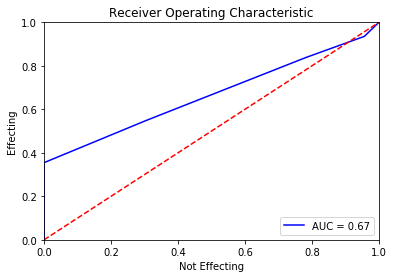

In [357]:
# PLOT ROC curve "Receiver Operating Characteristics"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Effecting')
plt.xlabel('Not Effecting')
plt.show()

In [358]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_test_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_test_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_test_pred) * 100))
print(confusion_matrix(y_test,y_test_pred)) 


Accuracy score: 53.703704
Recall score : 75.000000
ROC score : 48.863636

[[24  8]
 [17  5]]
